In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, plotly.express as px
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf

In [3]:
cobr = yf.Ticker('cobr.l')
cobr

yfinance.Ticker object <COBR.L>

In [4]:
cobr_data = cobr.history(period='max')
cobr_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,601.000000,601.000000,601.000000,601.000000,6.010000e+02,601.0,601.0
mean,1.647150,1.718624,1.570373,1.651780,2.963395e+06,0.0,0.0
std,0.661159,0.725972,0.601199,0.659354,6.318488e+06,0.0,0.0
min,0.725000,0.650000,0.650000,0.725000,0.000000e+00,0.0,0.0
25%,1.250000,1.250000,1.250000,1.250000,0.000000e+00,0.0,0.0
50%,1.250000,1.250000,1.250000,1.250000,6.672780e+05,0.0,0.0
75%,2.200000,2.324000,2.056000,2.200000,3.662899e+06,0.0,0.0
max,3.500000,3.900000,3.300000,3.500000,6.326053e+07,0.0,0.0


In [5]:
cobr_data.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-15,1.675,1.748,1.675,1.75,116500,0,0
2018-11-16,1.750,1.750,1.750,1.75,0,0,0
2018-11-19,1.650,1.650,1.650,1.65,0,0,0


## plot with go, 不能更换style, 够不允许调整figsize

In [6]:
import plotly.graph_objects as go

In [7]:
cobr_2020 = cobr_data[cobr_data.index >= '2020-1-1']

In [8]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


plt.figure(figsize=(20,8))
plt.style.use('classic')
fig = go.Figure([go.Scatter(x=cobr_2020.index, y=cobr_2020['Close'])])
fig.show()


<Figure size 1440x576 with 0 Axes>

## plot with matplotlib

In [9]:
cobr_2020.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,1.25,1.25,1.25,1.25,0,0,0
2020-01-03,1.25,1.25,1.25,1.25,0,0,0
2020-01-06,1.25,1.25,1.25,1.25,0,0,0
2020-01-07,1.25,1.25,1.25,1.25,0,0,0
2020-01-08,1.25,1.25,1.25,1.25,0,0,0


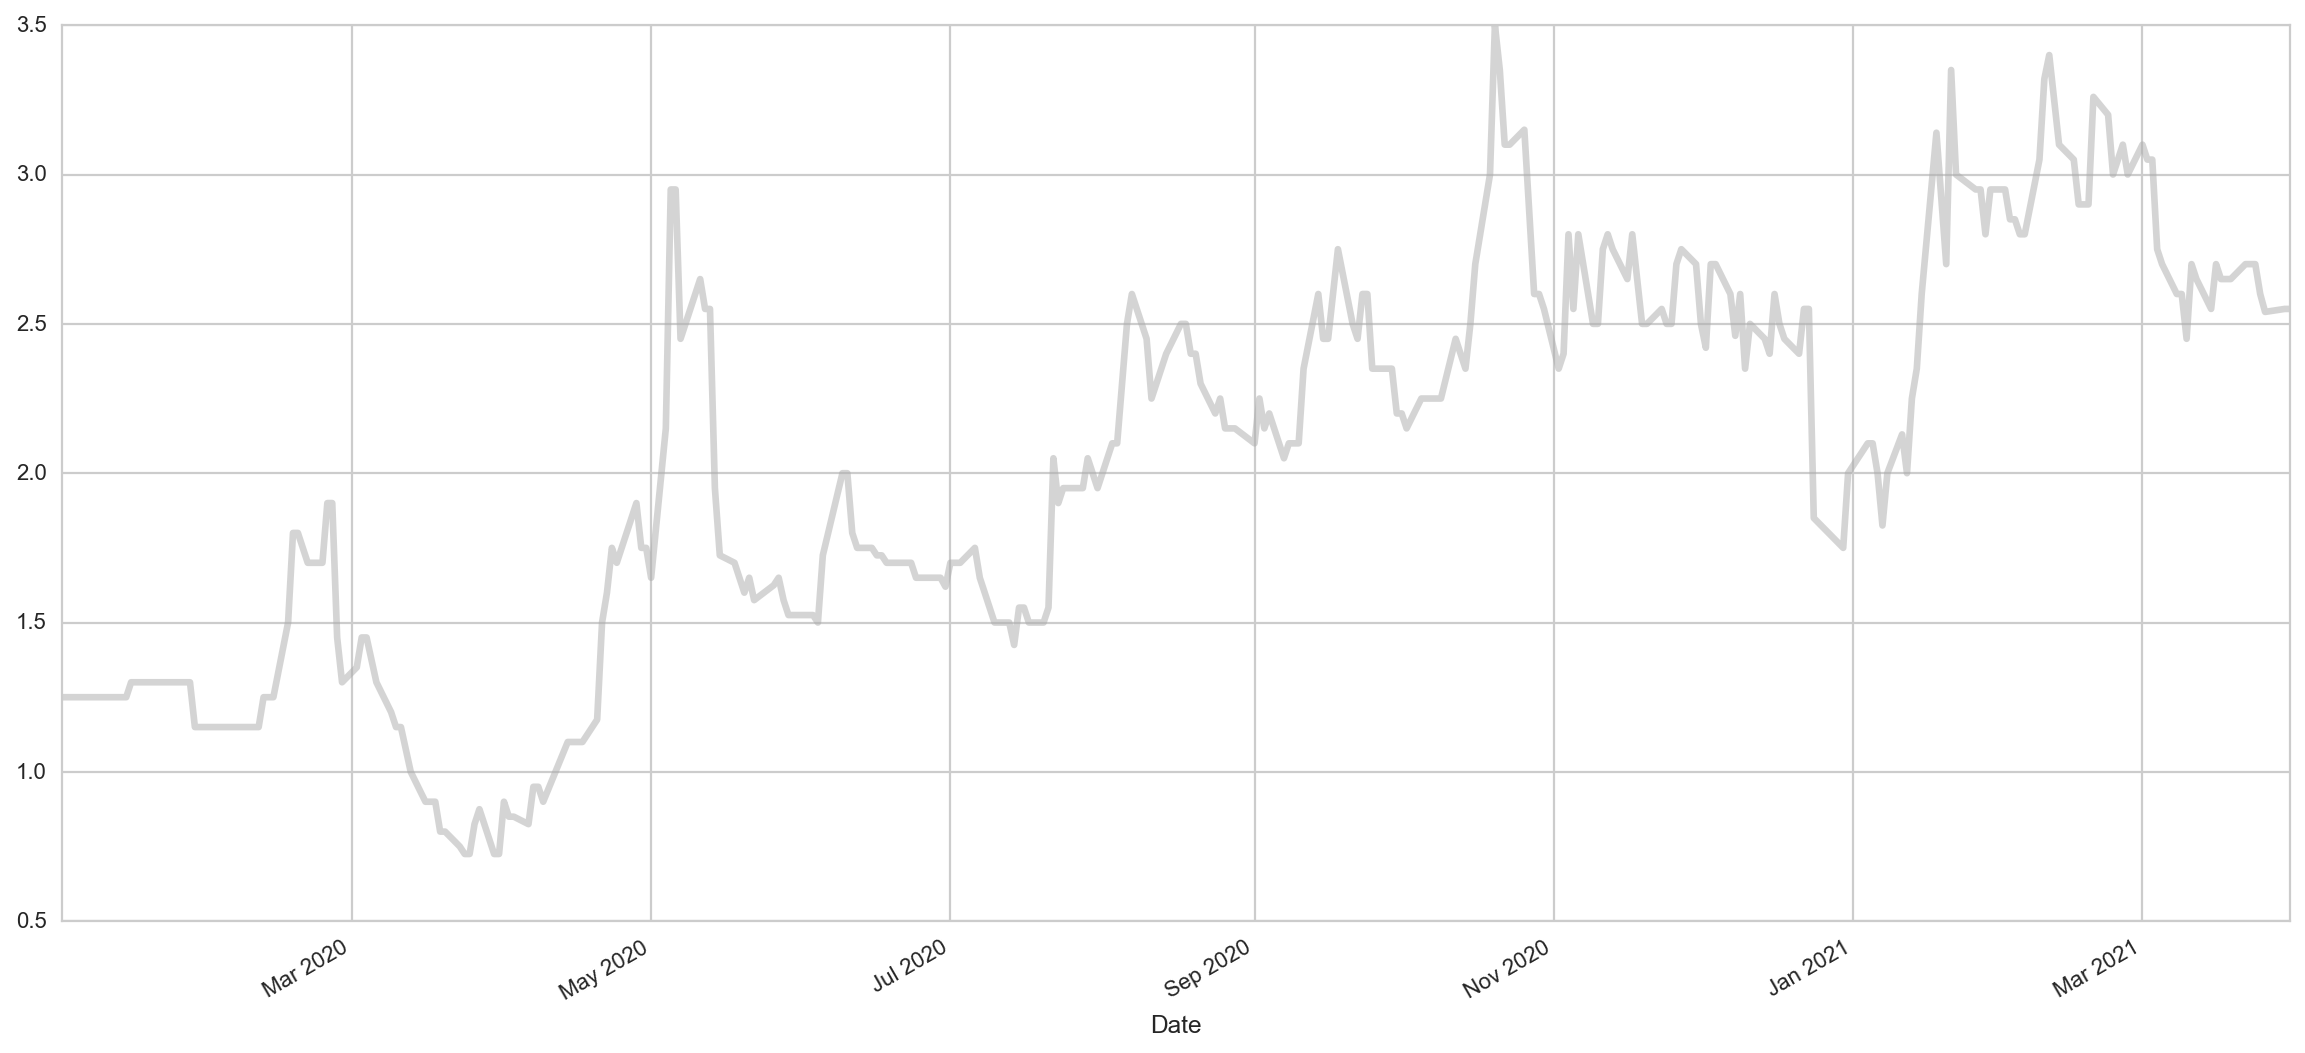

In [29]:
# %config InlineBackend.figure_format = 'retina'
# %matplotlib inline

import matplotlib.style as style
plt.figure(figsize=(16,8))
# plt.get_cmap('tab10')
plt.style.use('seaborn-notebook')
cobr_2020.Close.plot( color='C2', alpha=0.5, linewidth=3);


#### add 'raised price' into the graph

In [12]:
# create raised price column, fill in cobr rasied price, 2.25p, from 2020.2 onwards

cobr_2020['r_price_feb'] = 2.25

# chage the Jan raised price to 0, because it started on Feb
cobr_2020.iloc[:22,7] = 0

In [20]:
# second raise happend in 2020-9, at the price 2.30p

cobr_2020['r_price_sep'] = 2.30

# chage the Jan raised price to 0, because it started on Feb
cobr_2020[cobr_2020.index <= '2020-8-31'].r_price_sep = 0

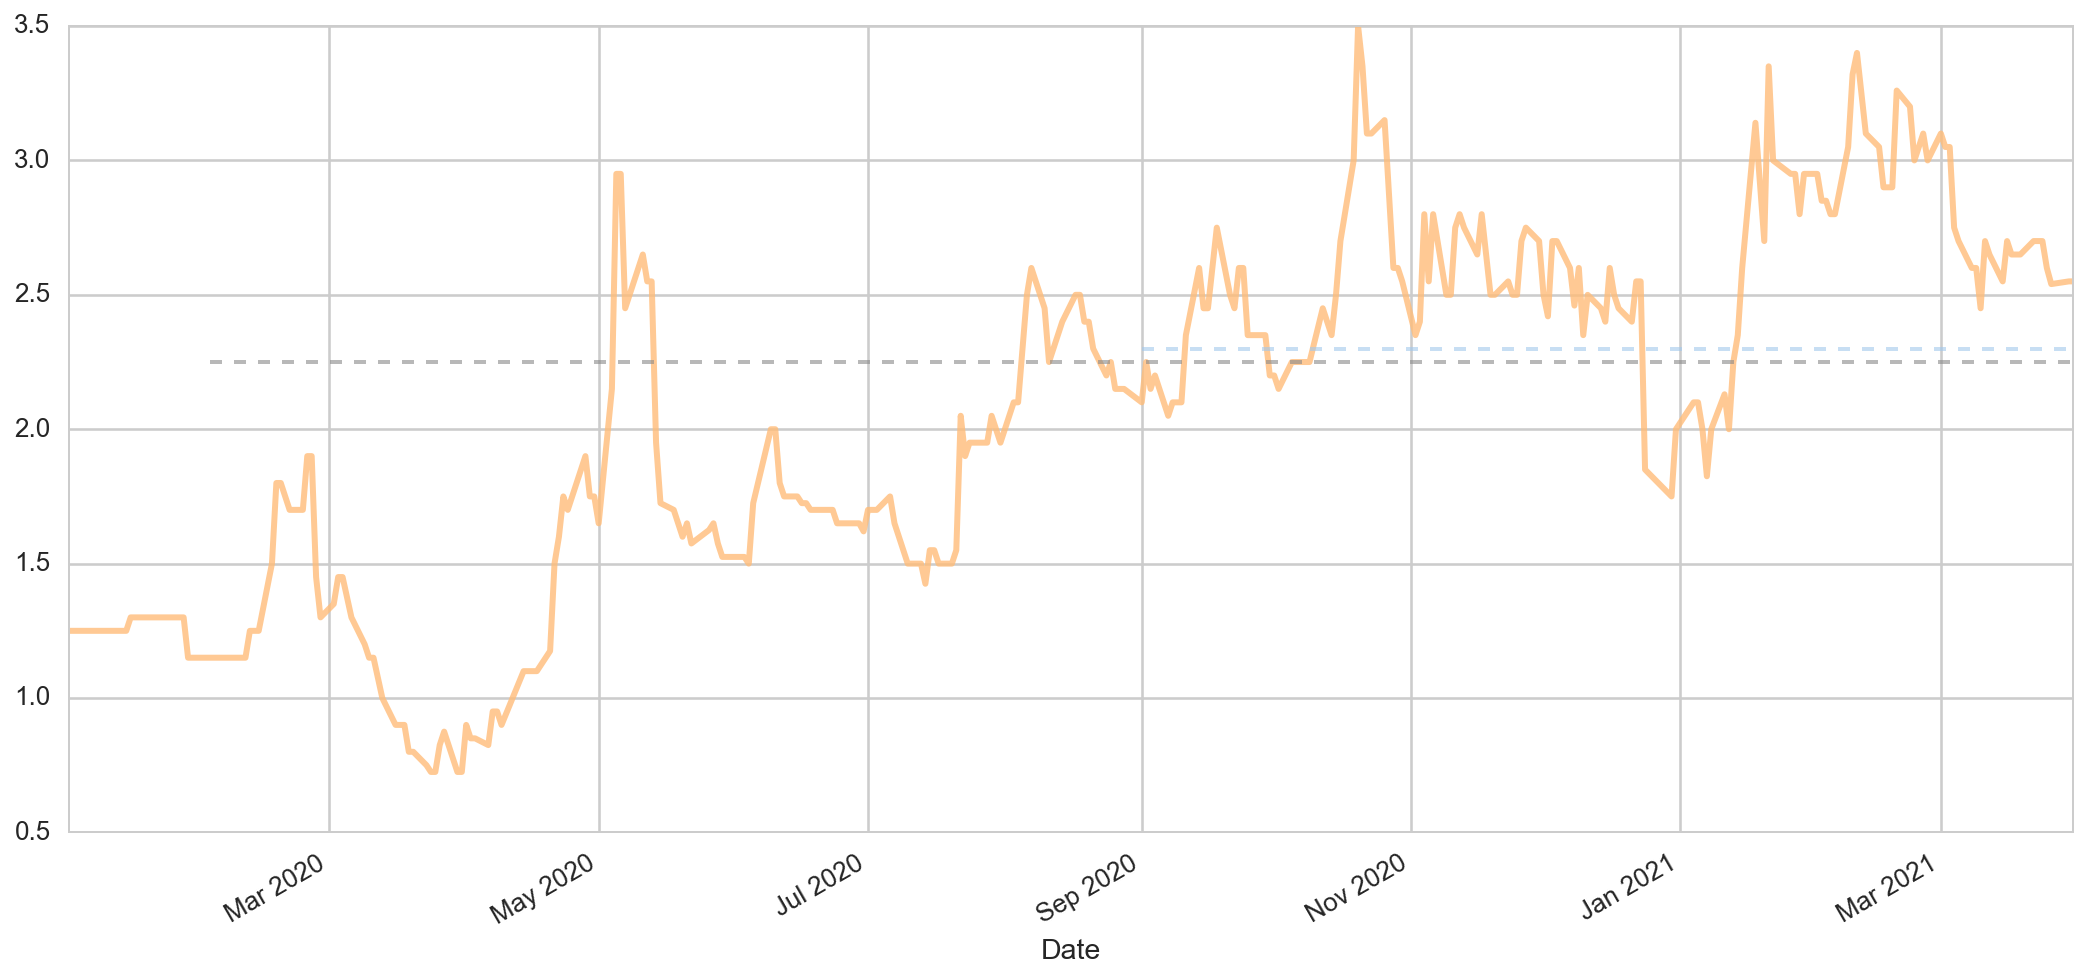

In [46]:
# plot current stock price and r_price
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.figure(figsize=(16,8))
plt.style.use('seaborn-whitegrid')
cobr_2020.Close.plot( color='C8', alpha=0.8, linewidth=3)
cobr_2020['2020-2-03':].r_price_feb.plot( color='C6', alpha=0.6, linewidth=2, ls='dashed')
cobr_2020[cobr_2020.index >= '2020-8-31'].r_price_sep.plot( color='C7', alpha=0.6, linewidth=2, ls='dashed')
plt.show()

In [ ]:
ax[0].text( i[0] + 0.2, i[1] - 0.5, str(i))

#### 增加 feb和sep raised price 的具体价格

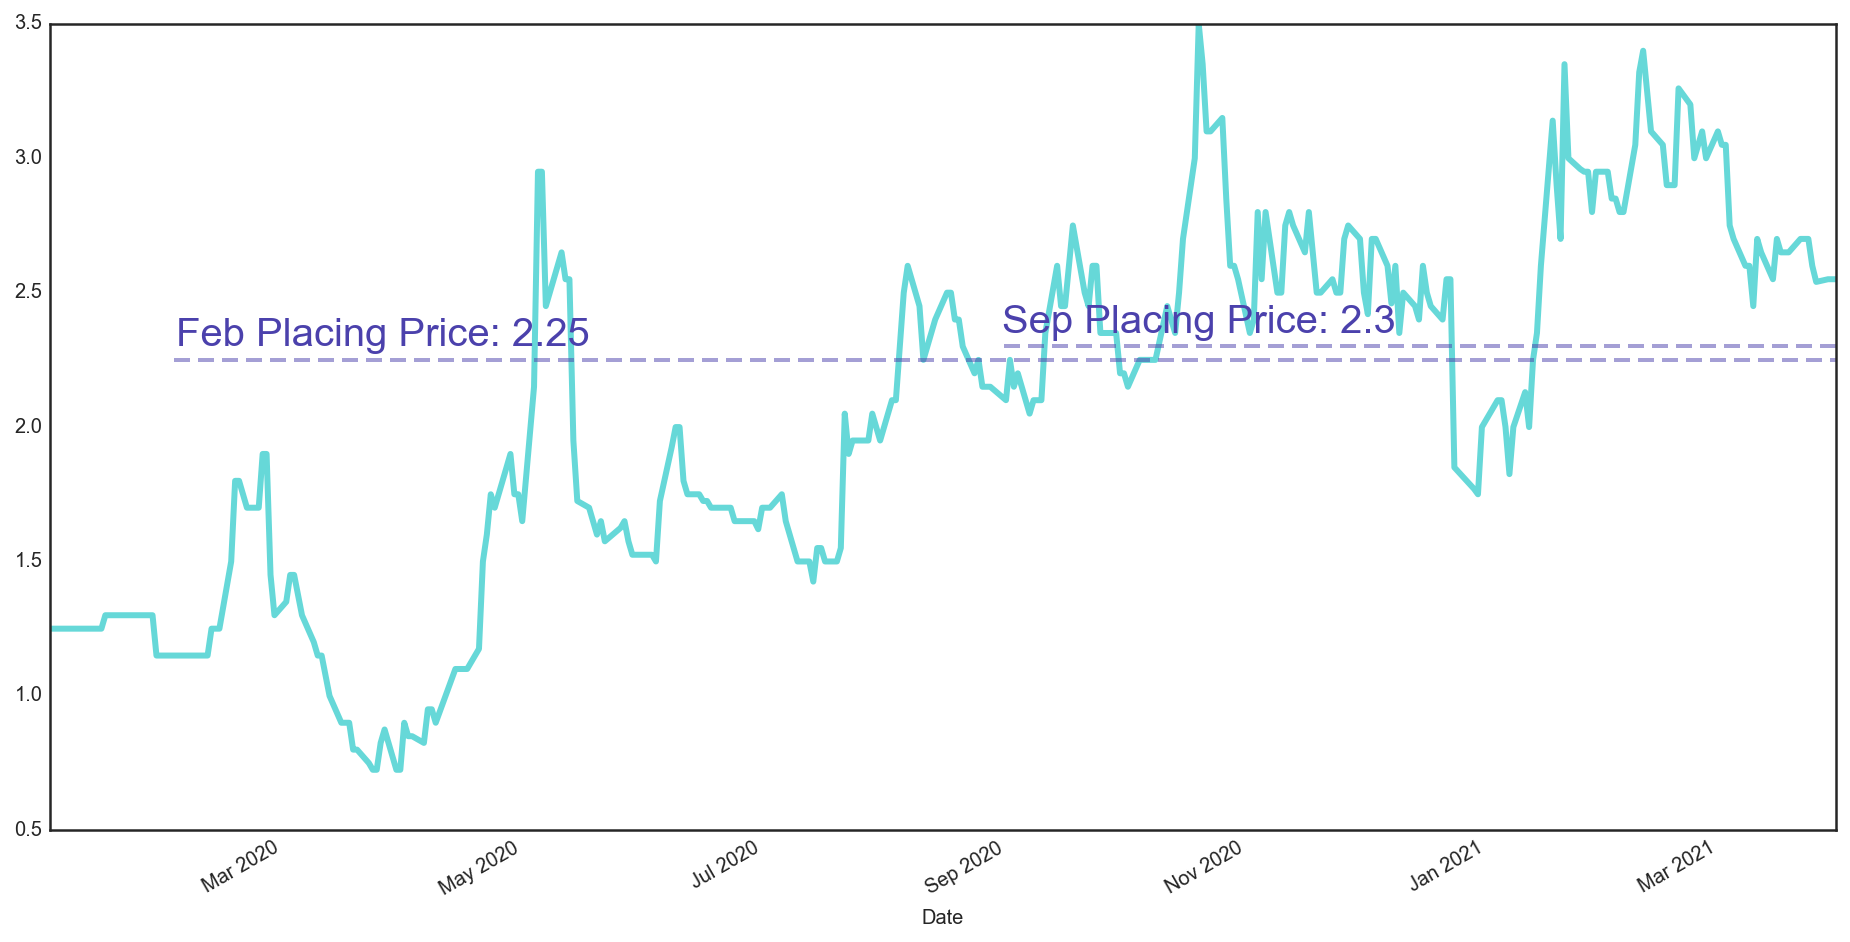

In [207]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.figure(figsize=(16,8))
plt.style.use('seaborn-white')
plt.text('2020-2-03', 2.25+0.05, 'Feb Placing Price: 2.25', fontsize=20, color='#4b41ac')
plt.text('2020-8-31', 2.3+0.05, 'Sep Placing Price: 2.3', fontsize=20, color='#4b41ac')
cobr_2020.Close.plot( color='C', alpha=0.6, linewidth=3)
cobr_2020['2020-2-03':].r_price_feb.plot( color='#4b41ac', alpha=0.5, linewidth=2, ls='dashed',dash_capstyle='projecting')
cobr_2020[cobr_2020.index >= '2020-8-31'].r_price_sep.plot( color='#4b41ac', alpha=0.5, linewidth=2, ls='dashed',dash_capstyle='projecting')
# plt.text('2020-2-03', 2.25+0.05, 'Feb Placing Price: 2.25', fontsize=20, color='C1')
# plt.text('2020-8-31', 2.3+0.05, 'Sep Placing Price: 2.3', fontsize=20, color='C7')
# plt.grid()

plt.show()

In [208]:
pre = yf.Ticker('pre.l')
pre.info

{'zip': 'SW1Y 5NQ',
 'sector': 'Basic Materials',
 'longBusinessSummary': 'Pensana Plc explores for and develops mineral properties in Angola. The company primarily explores for rare earth metals, consisting of neodymium and praseodymium (NdPr) deposits. Its flagship asset is 84% owned Longonjo NdPr Project located in Angola. The company was formerly known as Pensana Rare Earths Plc and changed its name to Pensana Plc in February 2021. Pensana Plc was incorporated in 2006 and is based in London, the United Kingdom.',
 'city': 'London',
 'country': 'United Kingdom',
 'companyOfficers': [],
 'website': 'http://www.pensana.co.uk',
 'maxAge': 1,
 'address1': '8 Signature by Regis',
 'industry': 'Other Industrial Metals & Mining',
 'address2': '100 Pall Mall St James',
 'previousClose': 145,
 'regularMarketOpen': 149.5,
 'twoHundredDayAverage': 94.42183,
 'trailingAnnualDividendYield': None,
 'payoutRatio': 0,
 'volume24Hr': None,
 'regularMarketDayHigh': 162,
 'navPrice': None,
 'averageDa

In [16]:
print(style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Solarize_Light2


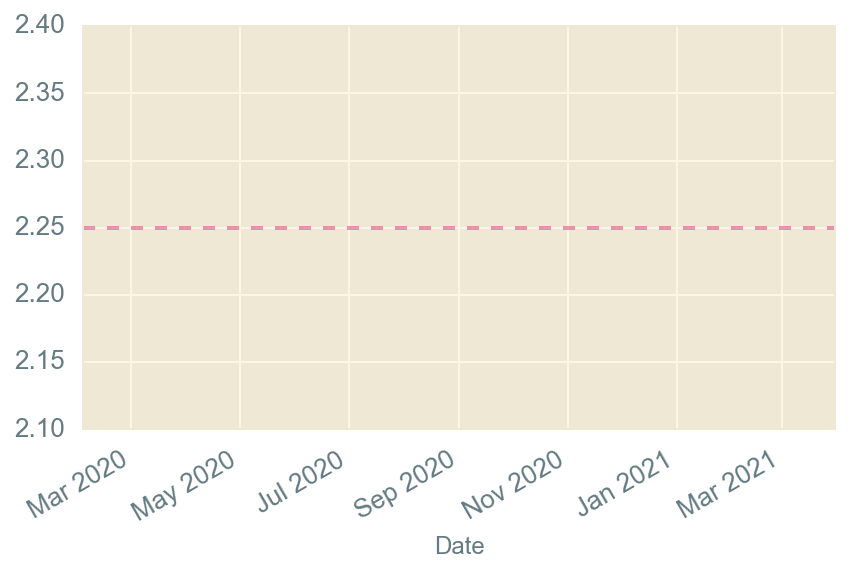

_classic_test_patch


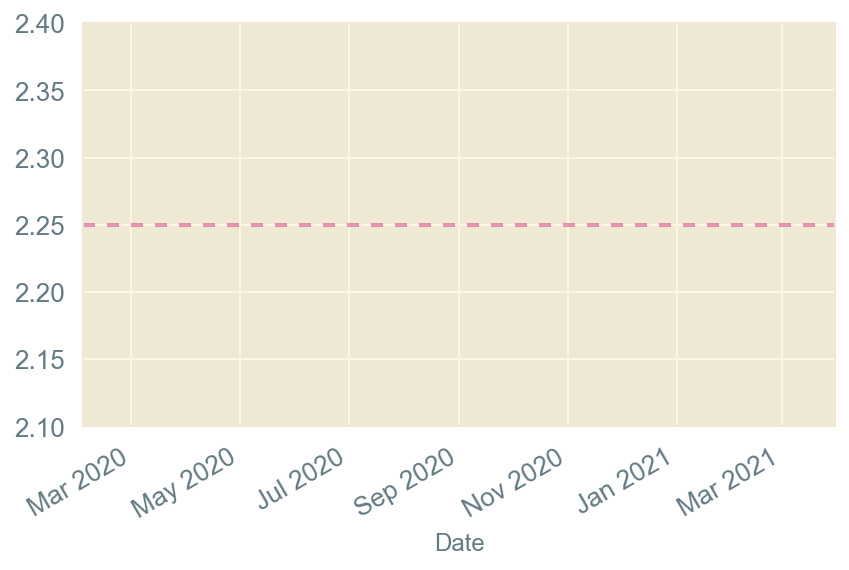

bmh


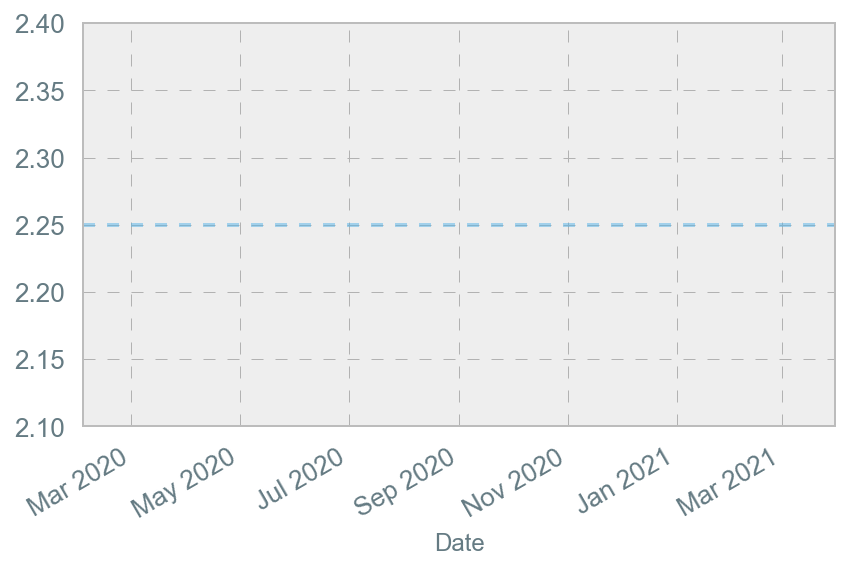

classic


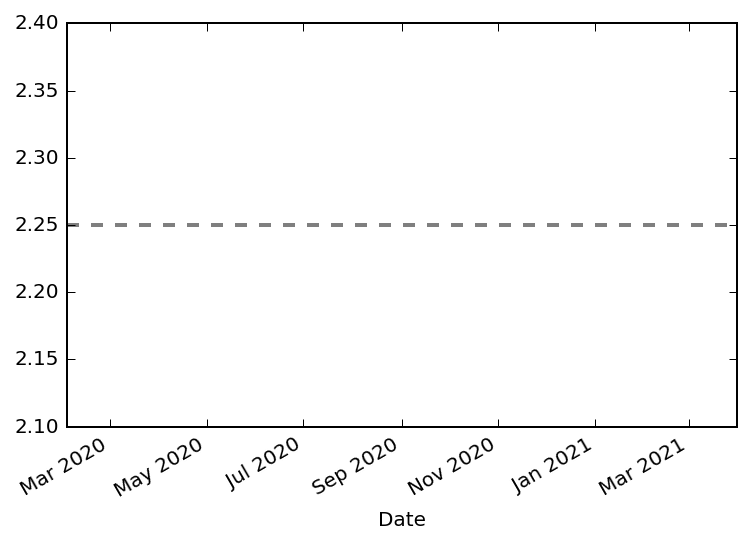

dark_background


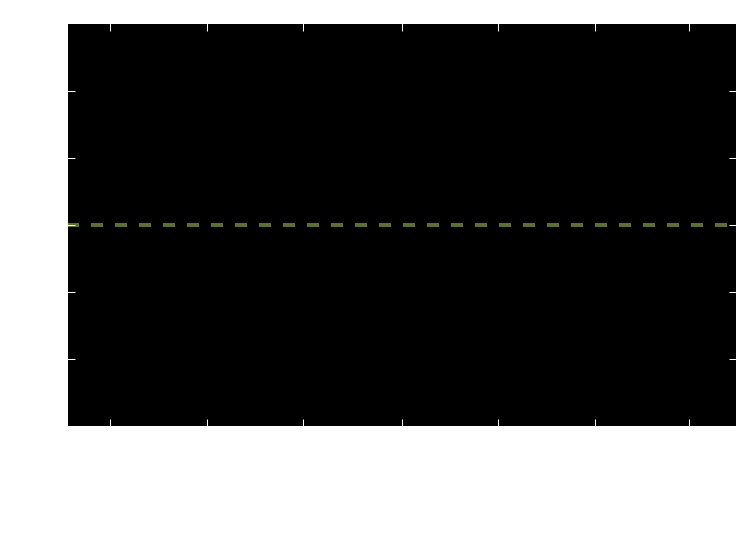

fast


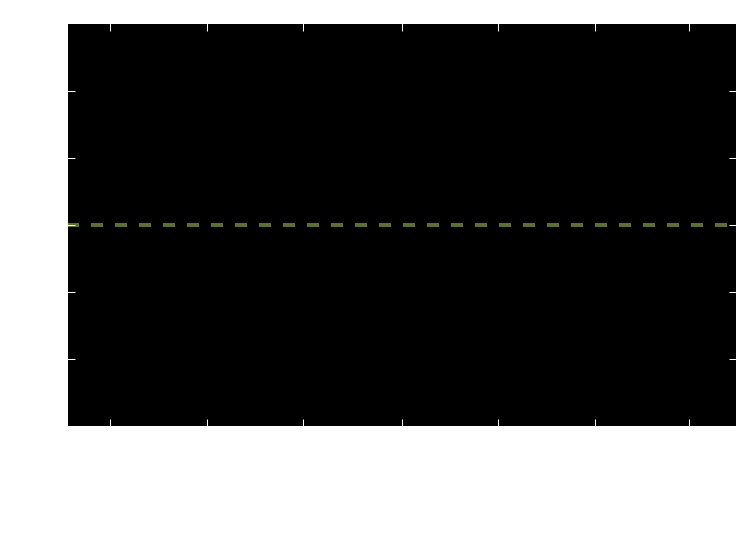

fivethirtyeight


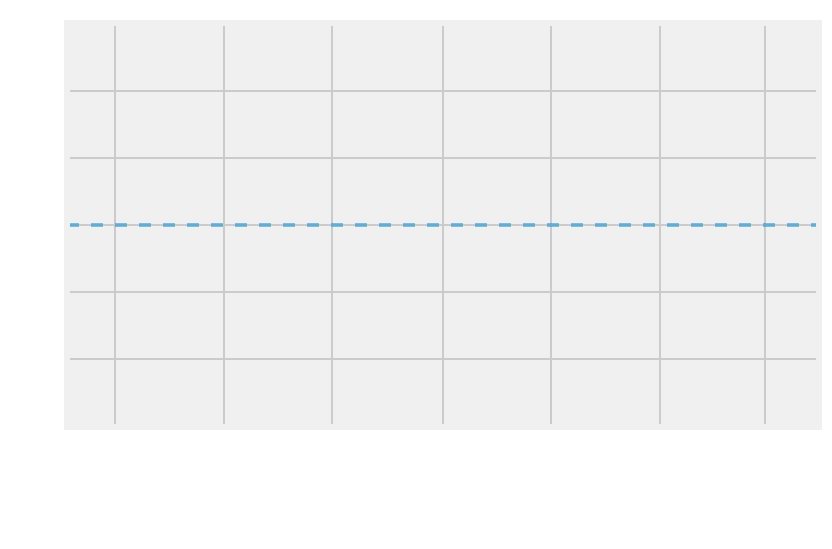

ggplot


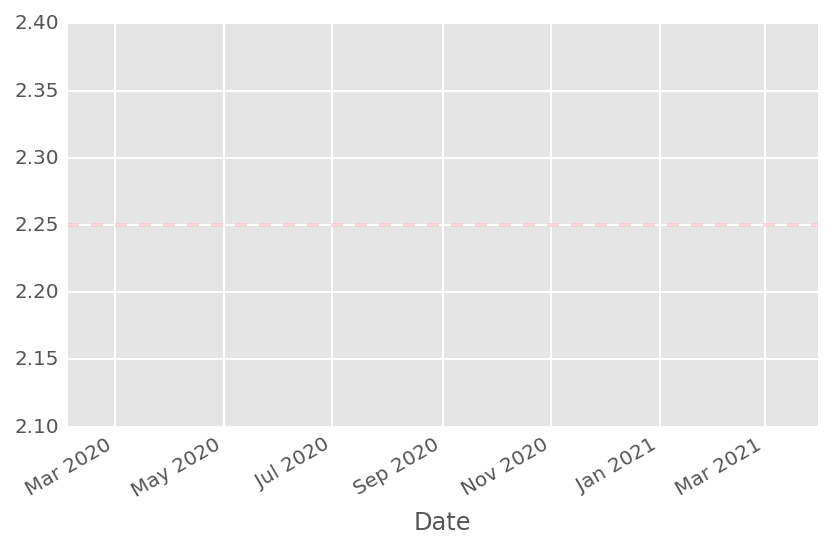

grayscale


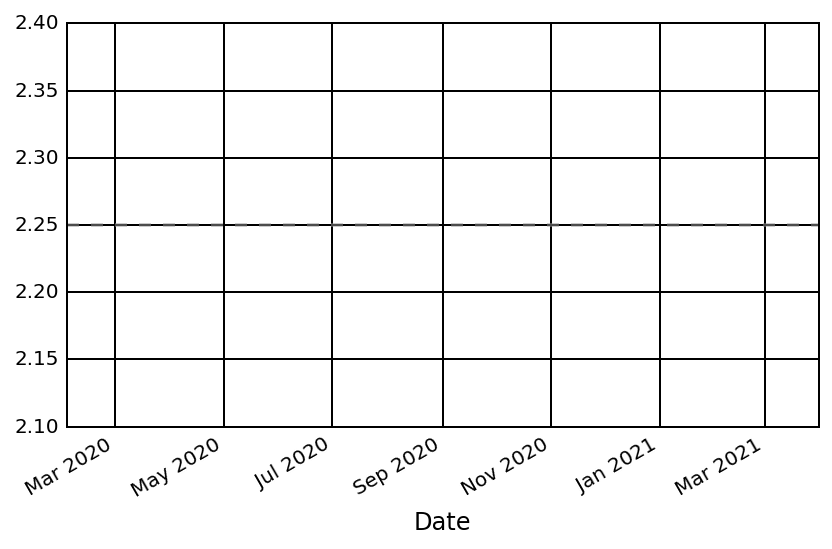

seaborn


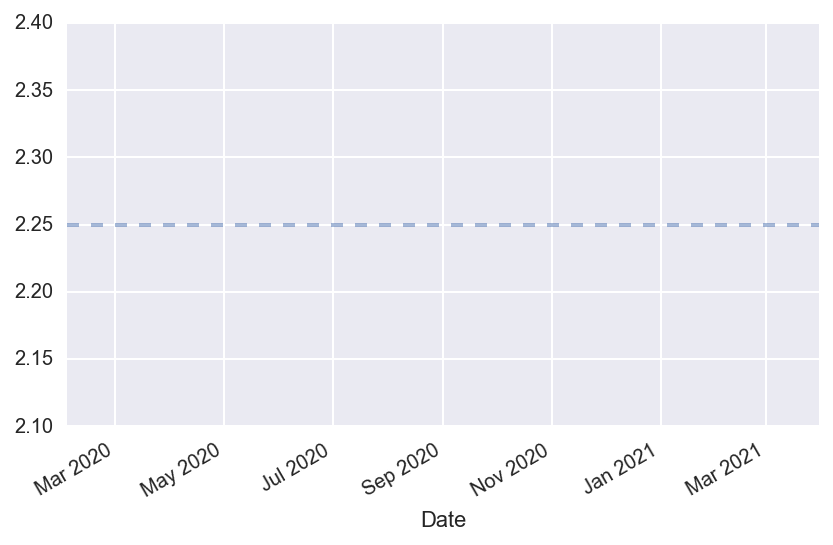

seaborn-bright


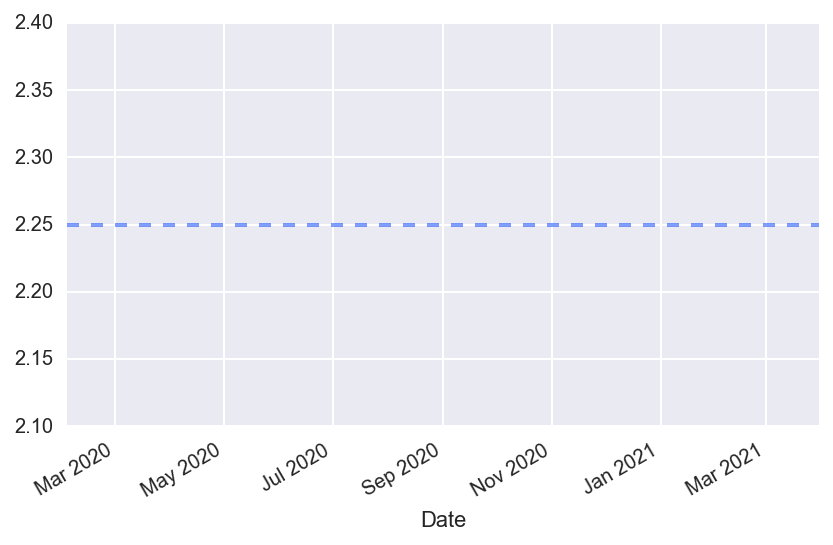

seaborn-colorblind


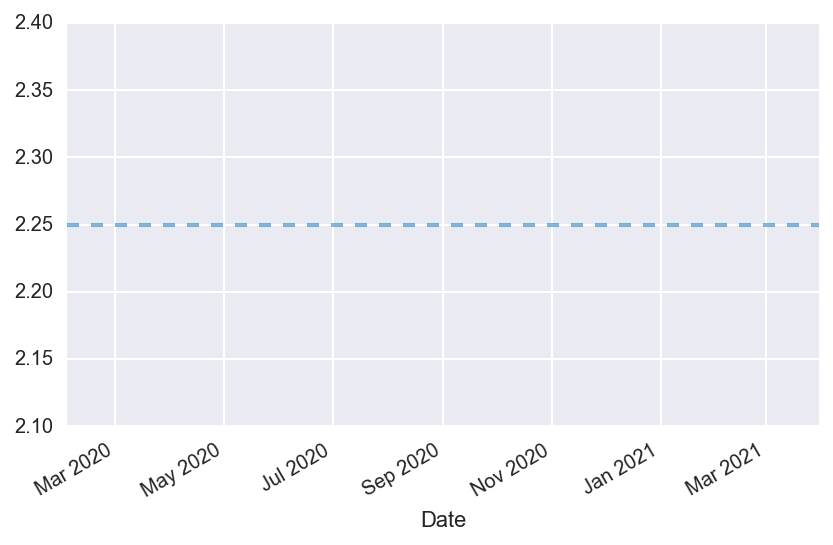

seaborn-dark


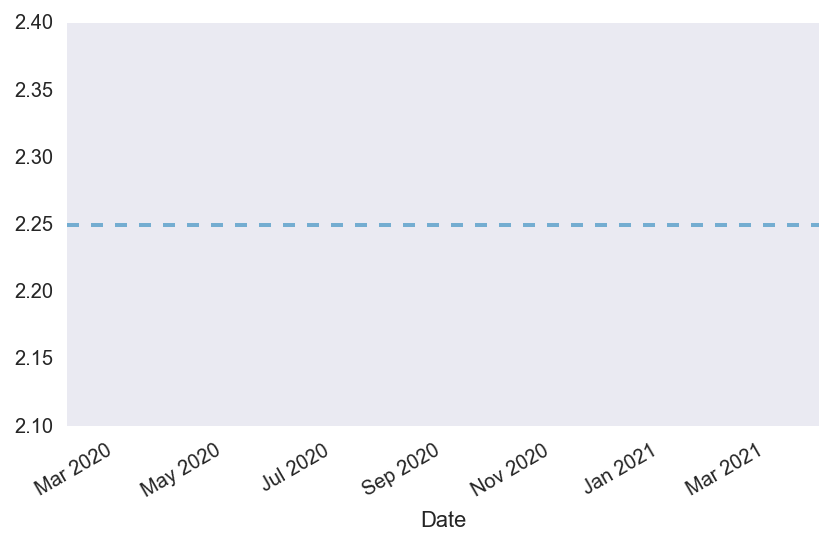

seaborn-dark-palette


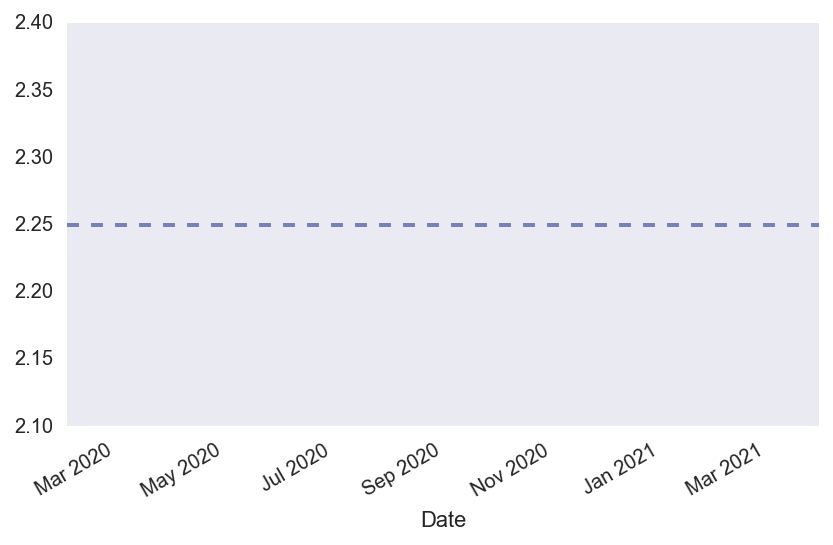

seaborn-darkgrid


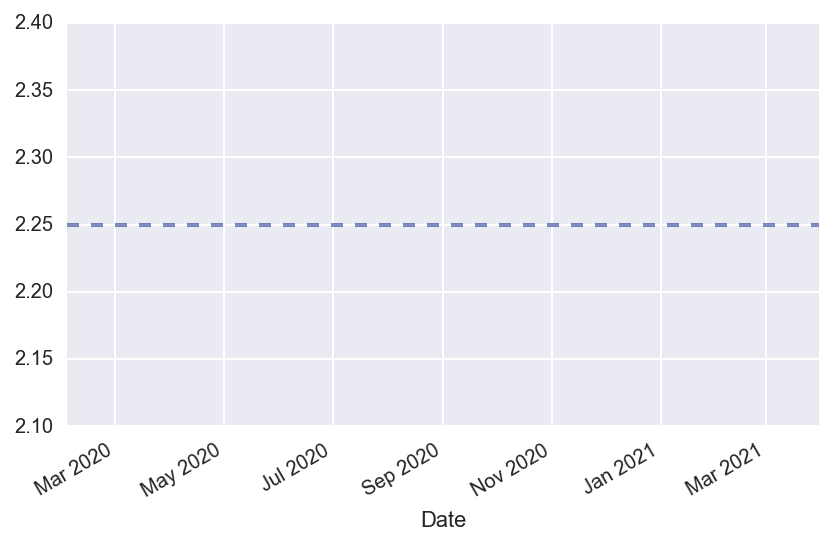

seaborn-deep


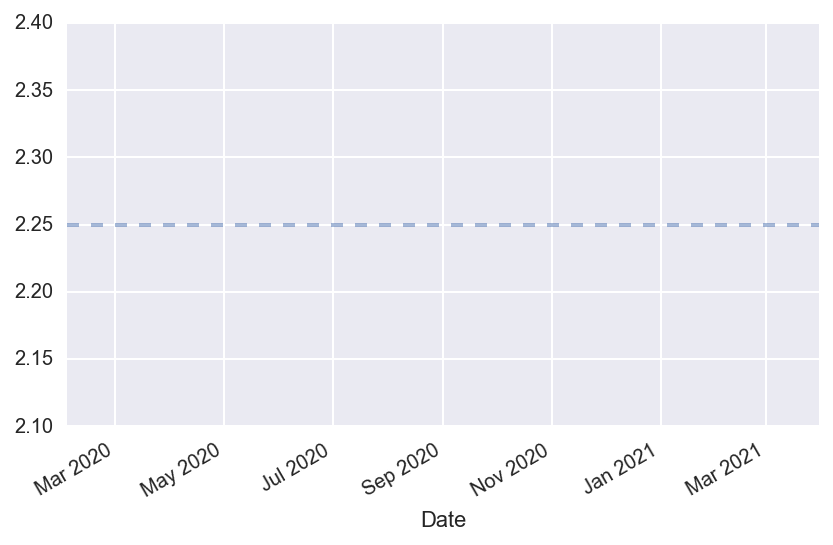

seaborn-muted


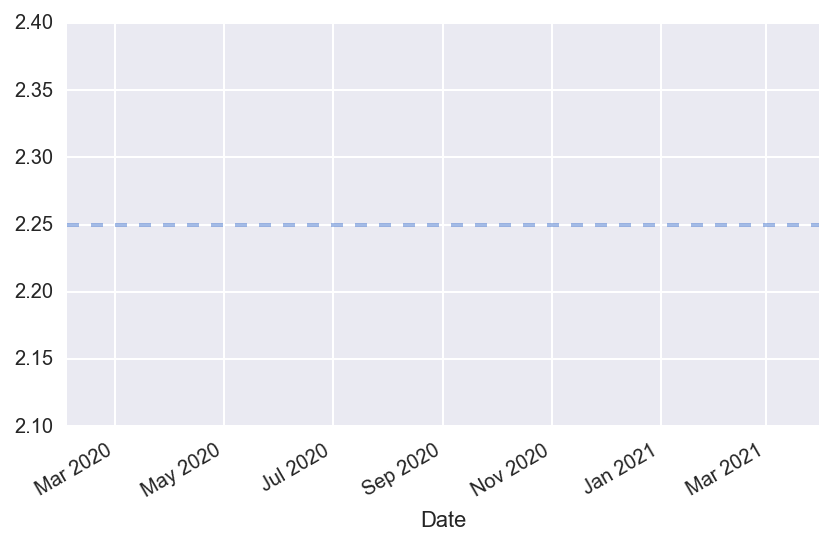

seaborn-notebook


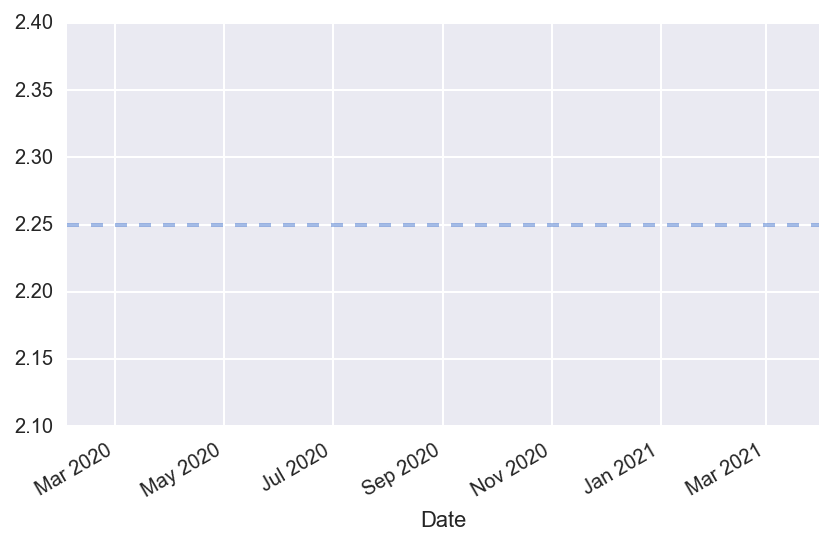

seaborn-paper


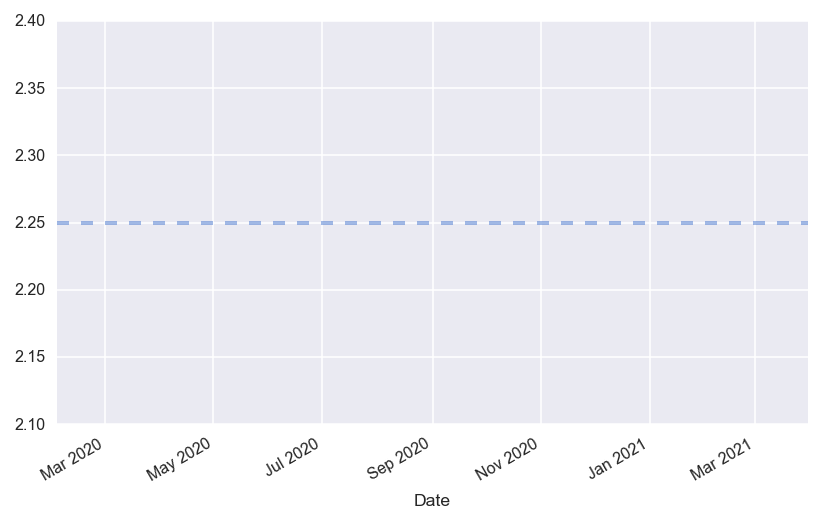

seaborn-pastel


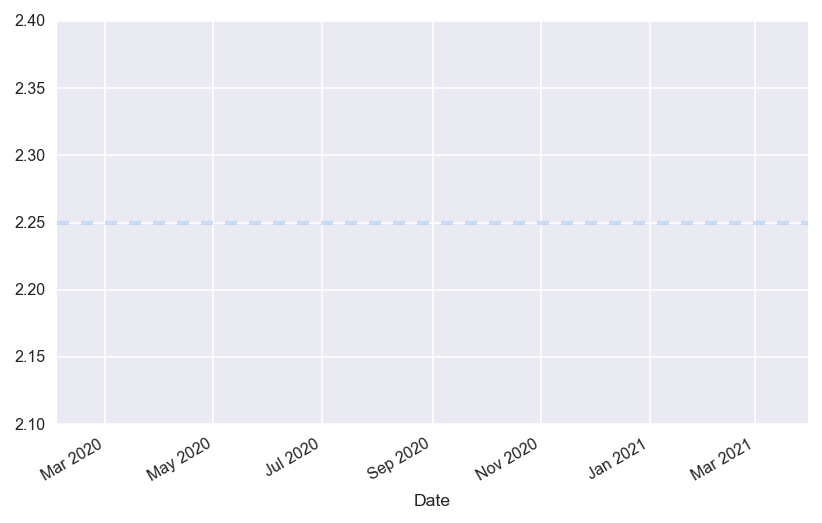

seaborn-poster


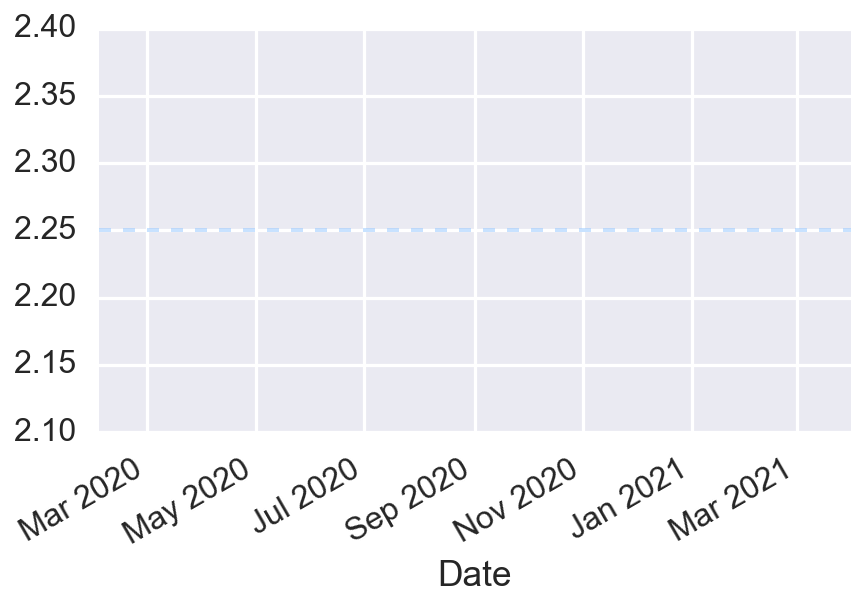

seaborn-talk


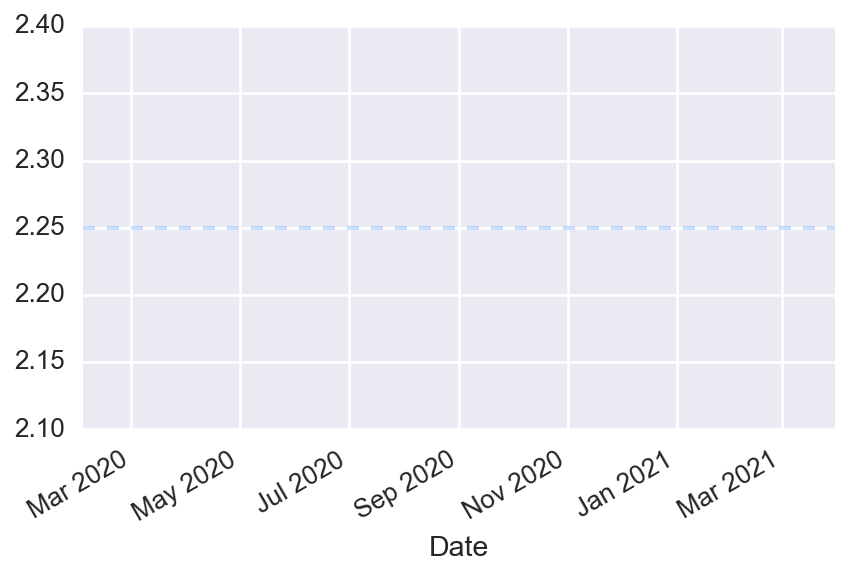

seaborn-ticks


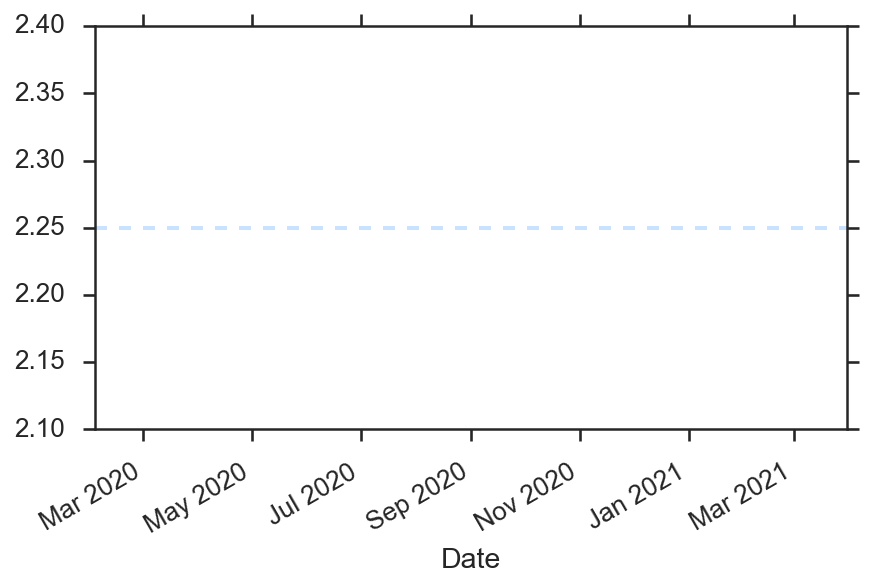

seaborn-white


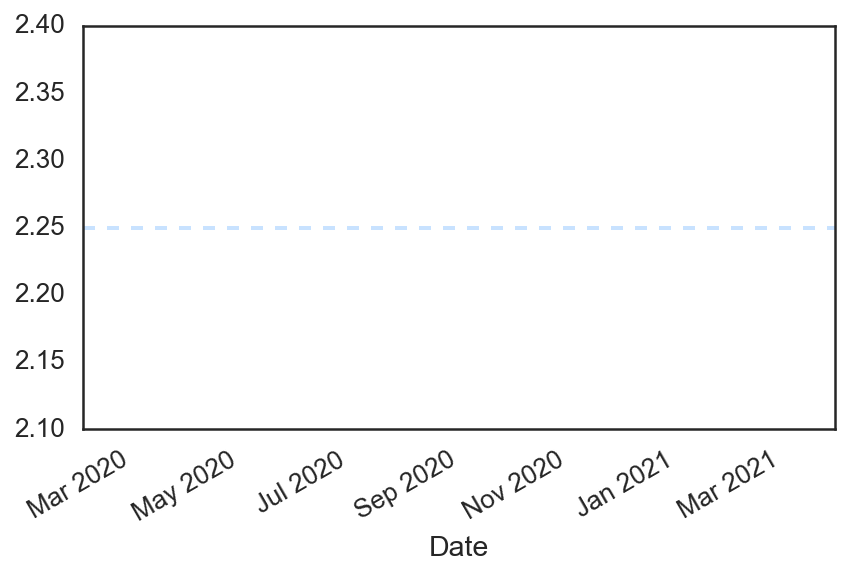

seaborn-whitegrid


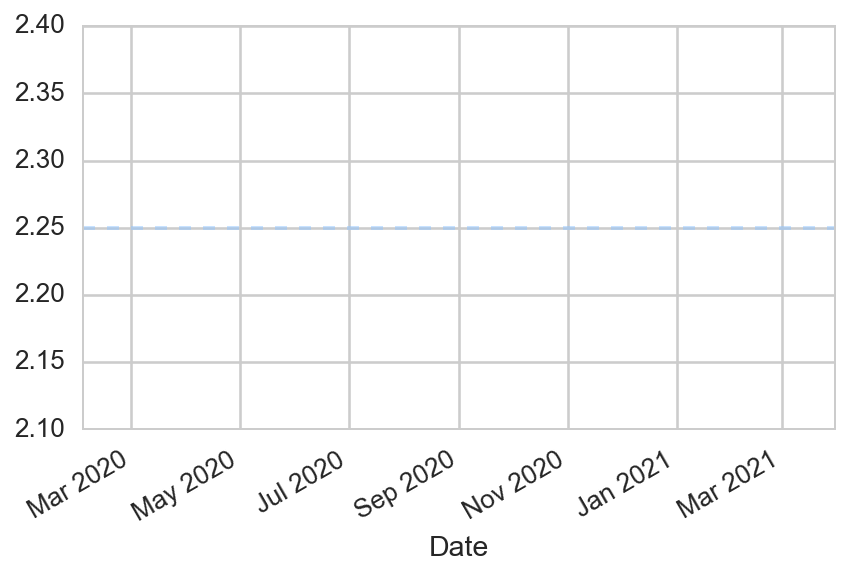

tableau-colorblind10


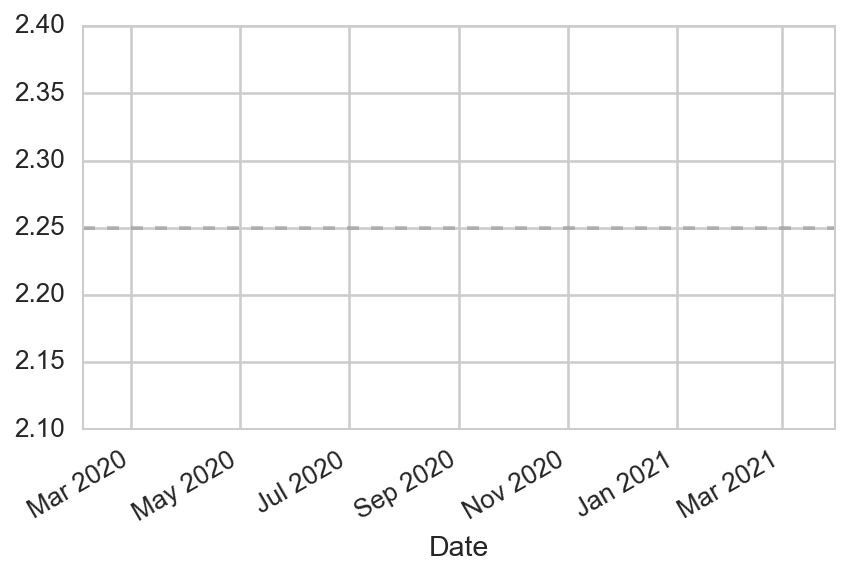

In [32]:
stl = style.available
for i in stl:
    
    plt.style.use(i)
    %config InlineBackend.figure_format = 'retina'
    %matplotlib inline
    
    print(i)
    cobr_2020['2020-2-03':].r_price_feb.plot( color='C6', alpha=0.5, linewidth=2, ls='dashed')

    plt.show()